# Product data EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from dotenv import load_dotenv

In [3]:
os.chdir('..')

In [4]:
from src.data_ingestion.data_ingestion import read_csv_data_from_hadoop
from src.utils.data_preprocessing import  is_missing_value , remove_missing_values, find_missing_values, find_outlier_box_plot ,find_outliers_IQR , remove_missing_values , remove_outliers , count_missing_values_per_column

In [5]:
load_dotenv()
hadoop_raw_data_path = os.getenv('hadoop_raw_data_path')
product_data_path = '/product.csv'
path = hadoop_raw_data_path + product_data_path

In [6]:
#laod data from hadoop 
data = read_csv_data_from_hadoop(hadoop_data_directory=path)

In [7]:
data.show(5)

+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
|   id|gender|masterCategory|subCategory|articleType|baseColour|season|year| usage|  productDisplayName|
+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
|15970|   Men|       Apparel|    Topwear|     Shirts| Navy Blue|  Fall|2011|Casual|Turtle Check Men ...|
|39386|   Men|       Apparel| Bottomwear|      Jeans|      Blue|Summer|2012|Casual|Peter England Men...|
|59263| Women|   Accessories|    Watches|    Watches|    Silver|Winter|2016|Casual|Titan Women Silve...|
|21379|   Men|       Apparel| Bottomwear|Track Pants|     Black|  Fall|2011|Casual|Manchester United...|
|53759|   Men|       Apparel|    Topwear|    Tshirts|      Grey|Summer|2012|Casual|Puma Men Grey T-s...|
+-----+------+--------------+-----------+-----------+----------+------+----+------+--------------------+
only showing top 5 rows



In [8]:
df = pd.DataFrame(data.take(data.count()), columns=data.columns)
df.head(5)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [9]:
df.shape

(44446, 10)

In [10]:
#check if missing values exist in the dataset
is_missing_value(df)


np.True_

In [12]:
# count column missing values
count_missing_values_per_column(df)

id                     0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour             0
season                21
year                   1
usage                  1
productDisplayName     0
dtype: int64

In [18]:
# drop missing values 
df = remove_missing_values(df)


In [20]:
df.dtypes


id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

In [27]:
df['year'] = df['year'].astype('int')

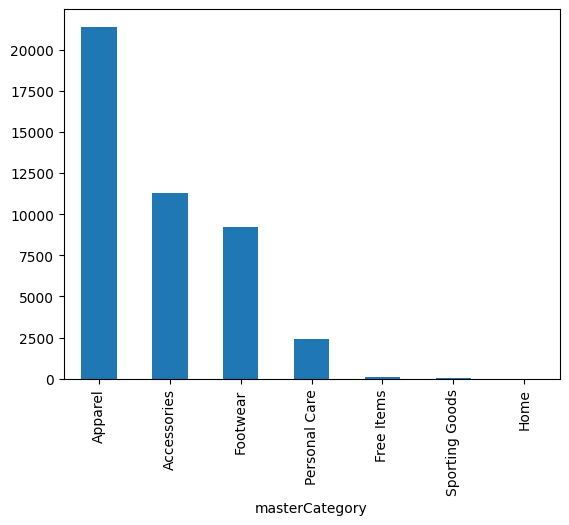

In [15]:
# plot bar chart for product category
df['masterCategory'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# aggregate data by master category
master_category_aggregate = df.groupby('masterCategory').agg(
    subCategory_count=('subCategory', 'nunique'),
    subCategory_list=('subCategory', lambda x: list(x.unique()))

).reset_index()
master_category_aggregate

,masterCategory,subCategory_count,subCategory_list
0,Accessories,20,"[Watches, Socks, Belts, Bags, Shoe Accessories..."
1,Apparel,8,"[Topwear, Bottomwear, Innerwear, Saree, Dress,..."
2,Footwear,3,"[Shoes, Flip Flops, Sandal]"
3,Free Items,2,"[Free Gifts, Vouchers]"
4,Home,1,[Home Furnishing]
5,Personal Care,11,"[Fragrance, Lips, Nails, Skin Care, Makeup, Sk..."
6,Sporting Goods,2,"[Sports Equipment, Wristbands]"


In [21]:
# aggregate by usage
usage_aggregate = df.groupby('usage').agg(
    subCategory_count=('subCategory', 'nunique'),
    subCategory_list=('subCategory', lambda x: list(x.unique()))

).reset_index()
usage_aggregate

,usage,subCategory_count,subCategory_list
0,Casual,43,"[Topwear, Bottomwear, Watches, Socks, Shoes, B..."
1,Ethnic,12,"[Topwear, Saree, Apparel Set, Jewellery, Botto..."
2,Formal,14,"[Topwear, Shoes, Belts, Bottomwear, Ties, Free..."
3,Home,1,[Home Furnishing]
4,NA,16,"[Nails, Topwear, Lips, Loungewear and Nightwea..."
5,Party,8,"[Dress, Bags, Shoes, Topwear, Free Gifts, Watc..."
6,Smart Casual,9,"[Topwear, Bottomwear, Shoes, Dress, Watches, W..."
7,Sports,19,"[Topwear, Shoes, Bottomwear, Bags, Watches, He..."
8,Travel,2,"[Bags, Topwear]"


In [25]:
#aggregate by season 

season_aggregate = df.groupby('season').agg({
    'subCategory': 'nunique',
    'subCategory': lambda x: list(x.unique())
}).reset_index()
print(season_aggregate)

   season                                        subCategory
0    Fall  [Topwear, Bottomwear, Flip Flops, Sandal, Belt...
1  Spring  [Fragrance, Lips, Nails, Shoes, Skin Care, Top...
2  Summer  [Bottomwear, Topwear, Socks, Shoes, Belts, Bag...
3  Winter  [Watches, Shoes, Jewellery, Bags, Innerwear, E...


In [26]:
# aggregate by gender and subCategory

gender_aggregate= df.groupby('gender').agg({
    'subCategory': 'nunique',
    'subCategory': lambda x: list(x.unique())
}).reset_index()
print(gender_aggregate)

   gender                                        subCategory
0    Boys  [Flip Flops, Topwear, Shoes, Bottomwear, Socks...
1   Girls  [Topwear, Bottomwear, Dress, Sandal, Watches, ...
2     Men  [Topwear, Bottomwear, Socks, Watches, Shoes, F...
3  Unisex  [Shoe Accessories, Bags, Topwear, Watches, Fli...
4   Women  [Watches, Topwear, Belts, Bags, Innerwear, Jew...


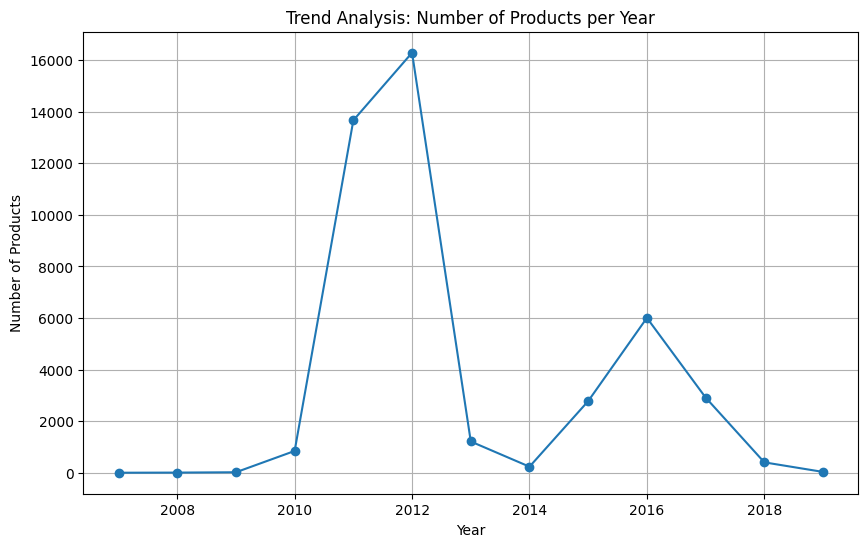

In [37]:


# Convert year column to integer (if it's a float)
df['year'] = df['year'].astype(int)

# Group by year and count the number of products for each year
yearly_counts = df.groupby('year').size()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title("Trend Analysis: Number of Products per Year")
plt.xlabel("Year")
plt.ylabel("Number of Products")
plt.grid(True)
plt.show()


In [32]:
# yearly counts
yearly_counts = df.groupby('year').agg({
    'masterCategory': 'nunique',
    'masterCategory': lambda x: list(x.unique())
})
yearly_counts

,masterCategory
year,
2007,[Footwear]
2008,"[Accessories, Apparel, Footwear]"
2009,"[Apparel, Accessories, Footwear]"
2010,"[Footwear, Apparel, Accessories, Sporting Good..."
2011,"[Apparel, Footwear, Accessories, Sporting Goods]"
2012,"[Apparel, Accessories, Footwear, Free Items, H..."
2013,"[Footwear, Apparel, Accessories]"
2014,"[Footwear, Apparel, Accessories]"
2015,"[Accessories, Footwear, Apparel, Free Items]"


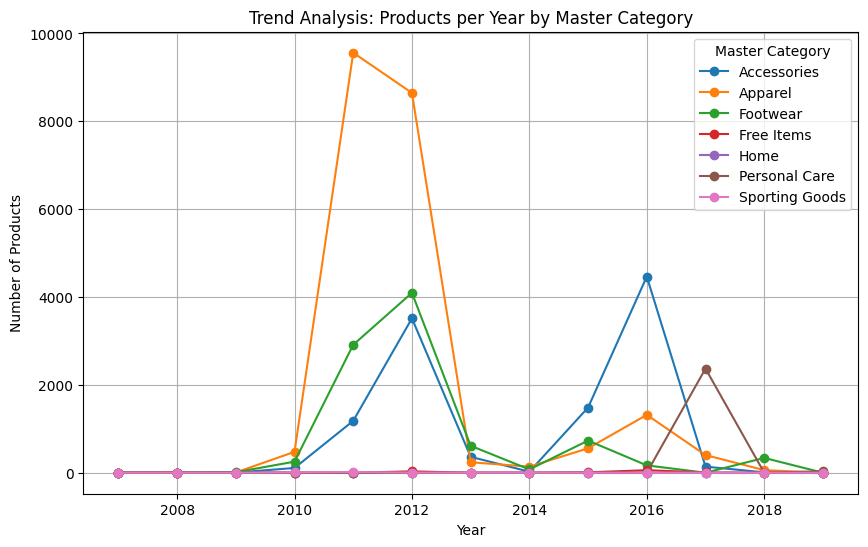

In [33]:
# Group by year and masterCategory, then count the number of products
master_year_counts = df.groupby(['year', 'masterCategory']).size().unstack(fill_value=0)

# Plot the trend for each masterCategory over time
plt.figure(figsize=(10, 6))
for category in master_year_counts.columns:
    plt.plot(master_year_counts.index, master_year_counts[category], marker='o', label=category)

plt.title("Trend Analysis: Products per Year by Master Category")
plt.xlabel("Year")
plt.ylabel("Number of Products")
plt.grid(True)
plt.legend(title="Master Category")
plt.show()


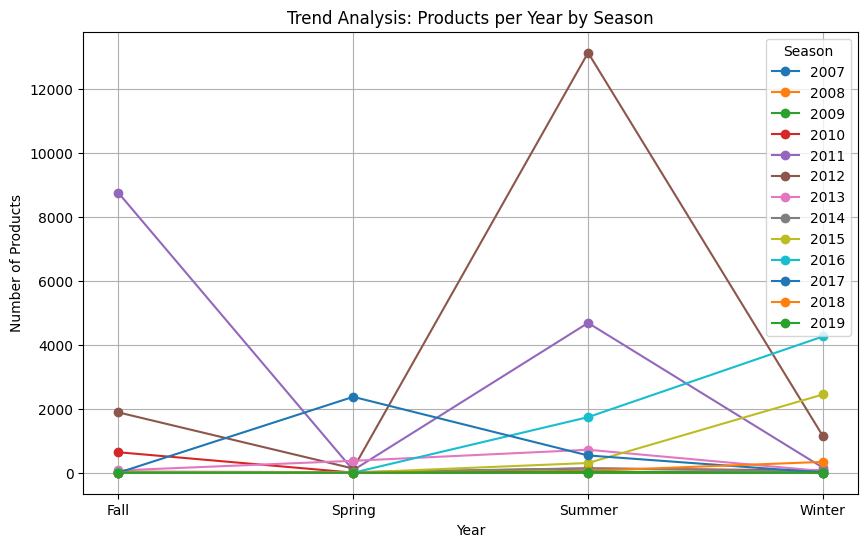

In [ ]:
# group by season and year and count the number of products to see seasonal products across the years
season_year_counts = df.groupby(['season', 'year']).size().unstack(fill_value=0)    

# Plot the trend for each season over time
plt.figure(figsize=(10, 6))
for season in season_year_counts.columns:
    plt.plot(season_year_counts.index, season_year_counts[season], marker='o', label=season)

plt.title("Trend Analysis: Products per Year by Season")
plt.xlabel("Year")
plt.ylabel("Number of Products")
plt.grid(True)
plt.legend(title="Season")
plt.show()



  masterCategory  subCategory  Count
0    Accessories  Accessories    143
1    Accessories         Bags   3055
2    Accessories        Belts    811
3    Accessories    Cufflinks    108
4    Accessories      Eyewear   1073


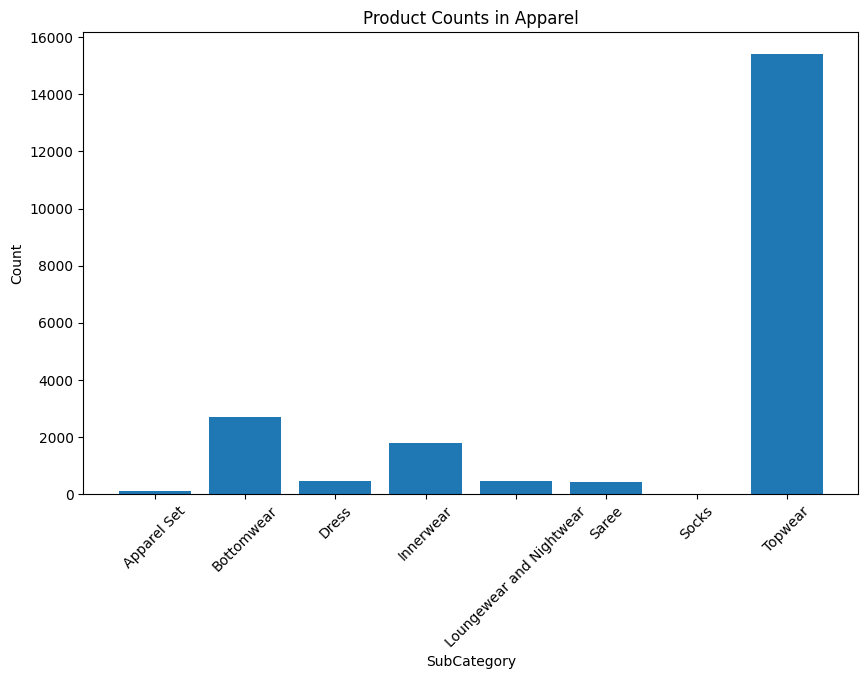

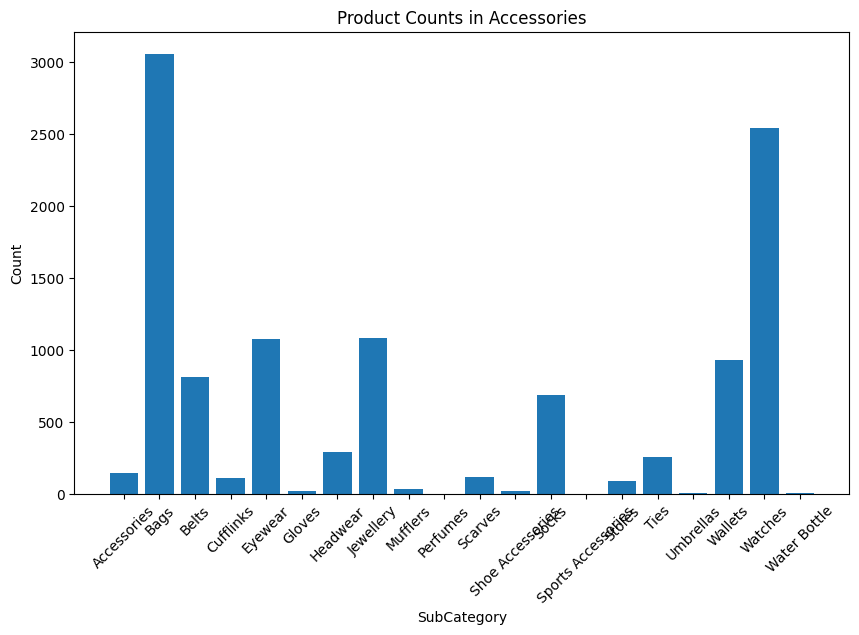

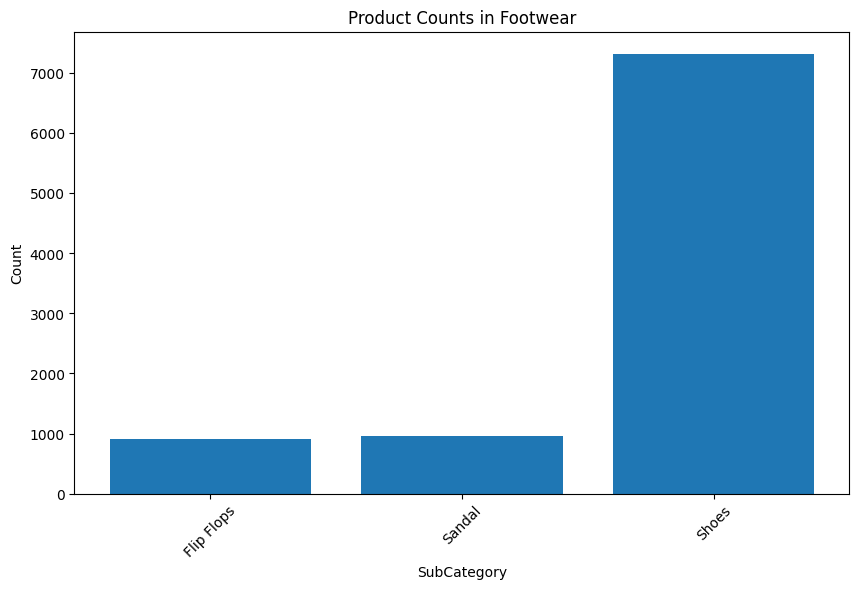

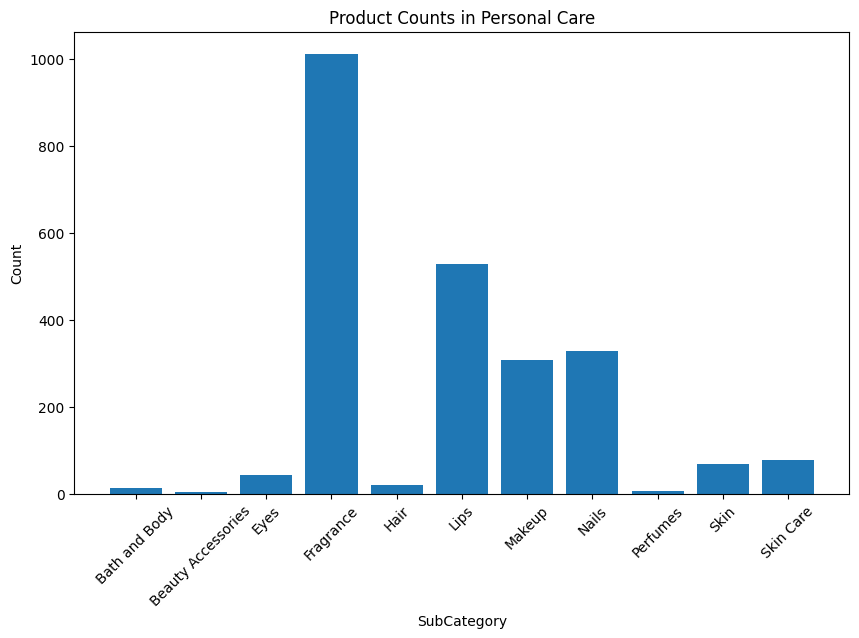

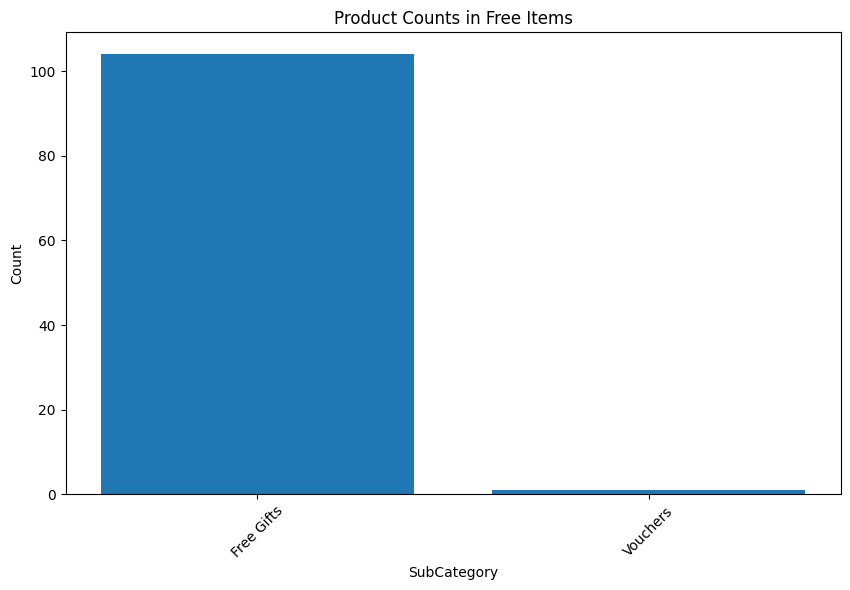

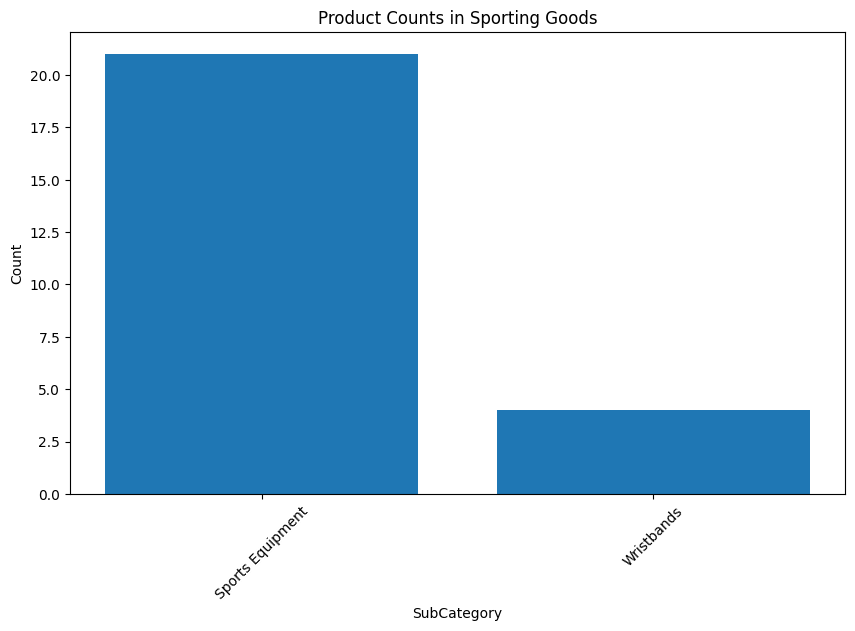

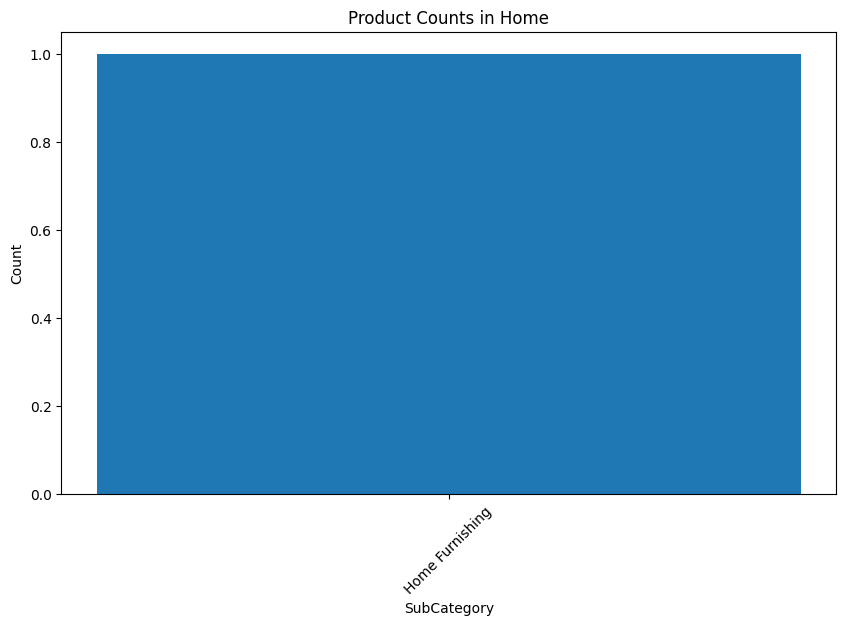

In [38]:
# Group by masterCategory and subCategory to count the products in each segment
category_counts = df.groupby(['masterCategory', 'subCategory']).size().reset_index(name='Count')
print(category_counts.head())

# Visualize product counts for each subcategory within a master category
unique_master_categories = df['masterCategory'].unique()

for cat in unique_master_categories:
    sub_df = category_counts[category_counts['masterCategory'] == cat]
    plt.figure(figsize=(10, 6))
    plt.bar(sub_df['subCategory'], sub_df['Count'])
    plt.title(f"Product Counts in {cat}")
    plt.xlabel("SubCategory")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


    gender         usage  Count
0     Boys        Casual    799
1     Boys        Ethnic     10
2     Boys        Sports     21
3    Girls        Casual    645
4    Girls        Ethnic      8
5    Girls        Sports      2
6      Men        Casual  16773
7      Men        Ethnic    107
8      Men        Formal   2249
9      Men            NA     23
10     Men         Party      2
11     Men  Smart Casual     54
12     Men        Sports   2946
13     Men        Travel      2
14  Unisex        Casual   1830
15  Unisex        Formal      1
16  Unisex          Home      1
17  Unisex            NA     29
18  Unisex        Sports    277
19  Unisex        Travel     20
20   Women        Casual  14367
21   Women        Ethnic   3083
22   Women        Formal    109
23   Women            NA    264
24   Women         Party     27
25   Women  Smart Casual     13
26   Women        Sports    758
27   Women        Travel      4


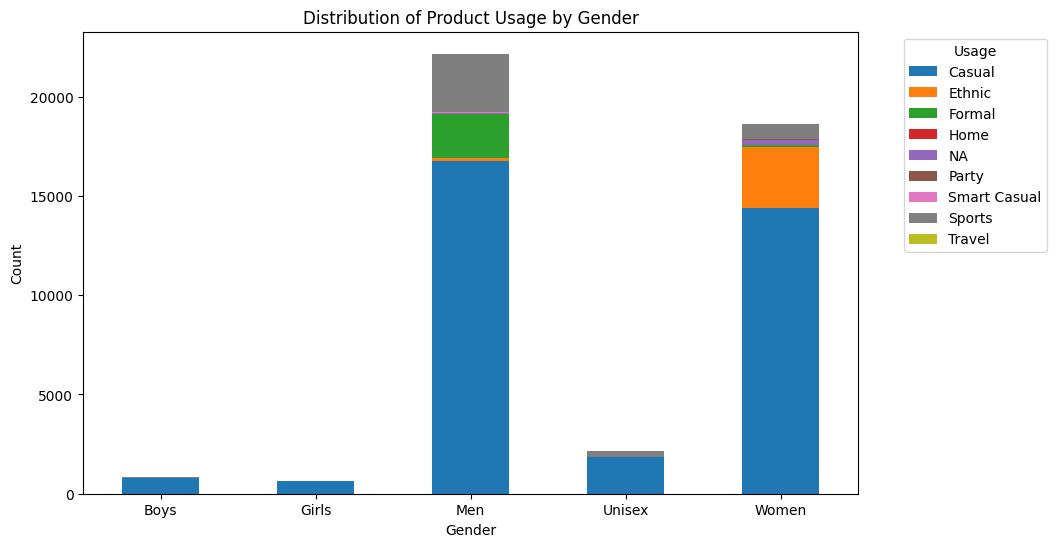

In [39]:
# Group by gender and usage to count the number of products in each segment
usage_gender = df.groupby(['gender', 'usage']).size().reset_index(name='Count')
print(usage_gender)

# Pivot the data for a stacked bar chart
usage_gender_pivot = usage_gender.pivot(index='gender', columns='usage', values='Count')
usage_gender_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution of Product Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Usage", bbox_to_anchor=(1.05, 1))
plt.show()


In [42]:

color_distribution = df.groupby(['gender', 'baseColour']).size().reset_index(name='Count')
print(color_distribution)



    gender      baseColour  Count
0     Boys           Beige      6
1     Boys           Black     83
2     Boys            Blue    159
3     Boys           Brown     10
4     Boys        Charcoal      1
..     ...             ...    ...
161  Women           Taupe     11
162  Women            Teal     88
163  Women  Turquoise Blue     55
164  Women           White   2029
165  Women          Yellow    327

[166 rows x 3 columns]
